In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('BTC-USD.csv')

df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
357,2024-06-13,68243.101563,68365.781250,66304.562500,66756.398438,66756.398438,28955204146
358,2024-06-14,66747.570313,67294.648438,65056.894531,66011.093750,66011.093750,27403884779
359,2024-06-15,66006.742188,66402.187500,65871.773438,66191.000000,66191.000000,14121265576
360,2024-06-16,66189.359375,66894.843750,66018.250000,66639.046875,66639.046875,13281140541
361,2024-06-17,66636.515625,67188.320313,65094.964844,66490.296875,66490.296875,30006354476
362,2024-06-18,66490.976563,66556.703125,64066.957031,65140.746094,65140.746094,39481285950
363,2024-06-19,65146.660156,65695.351563,64693.300781,64960.296875,64960.296875,21103423504
364,2024-06-20,64960.296875,66438.960938,64547.847656,64828.656250,64828.656250,25641109124
365,2024-06-21,64837.988281,65007.546875,63378.894531,64096.199219,64096.199219,26188171739
366,2024-06-22,64113.863281,64471.949219,63946.906250,64270.562500,64270.562500,21615667200


In [3]:
#CHECKING FOR NULL VALUES
df.isnull().values.any()

False

In [4]:
#drop adj close column
df=df.drop(columns=['Adj Close'])


([], [])

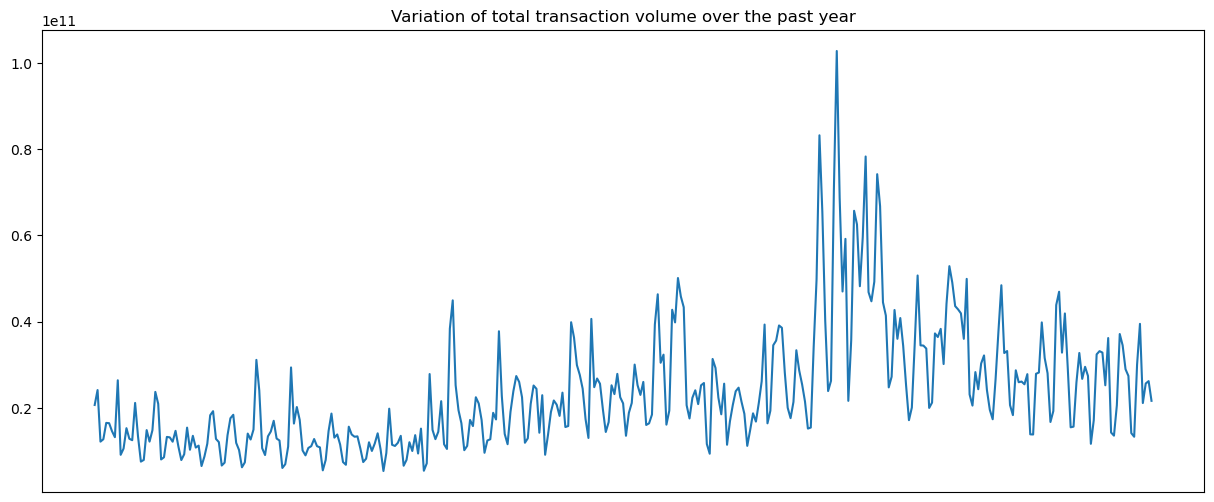

In [5]:
plt.title('Variation of total transaction volume over the past year')
plt.plot(df['Date'],df['Volume'])
plt.xticks([])



In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491
1,2023-06-23,29896.382813,31389.539063,29845.214844,30695.468750,24115570085
2,2023-06-24,30708.738281,30804.148438,30290.146484,30548.695313,12147822496
3,2023-06-25,30545.150391,31041.271484,30327.943359,30480.261719,12703464114
4,2023-06-26,30480.523438,30636.029297,29955.744141,30271.130859,16493186997


Text(0.5, 0, 'date')

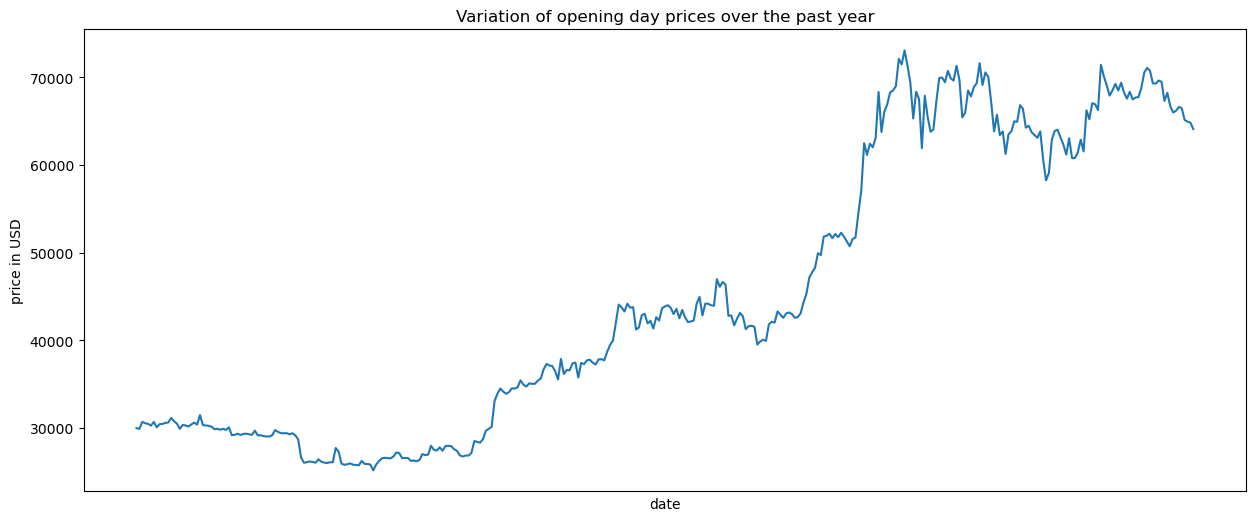

In [7]:
plt.plot(df['Date'],df['Open'])
plt.xticks([])
plt.title('Variation of opening day prices over the past year')
plt.ylabel('price in USD')
plt.xlabel('date')

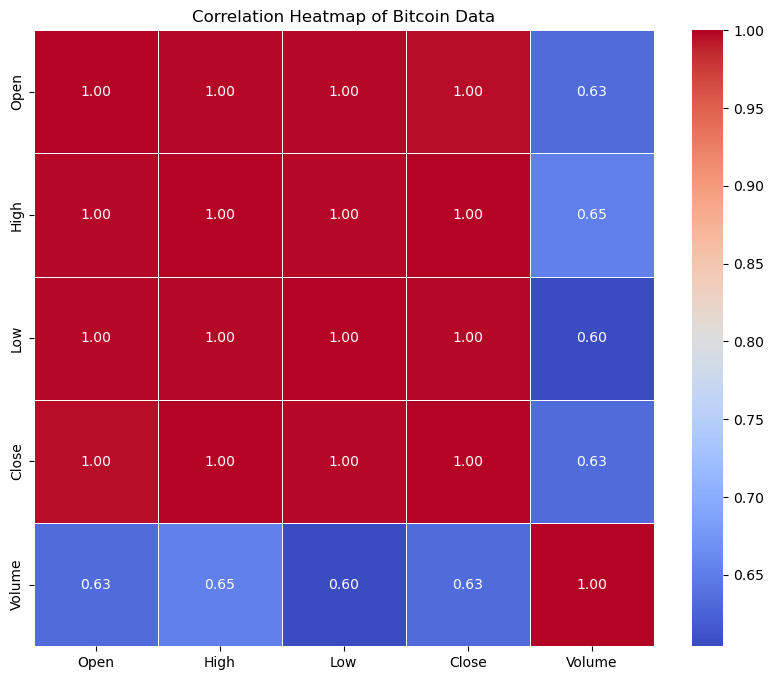

In [8]:
import seaborn as sns


# Calculate correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Bitcoin Data')
plt.show()


### CANDLE STICK CHART

In [9]:
# import mplfinance as mpf
# df['Date'] = pd.to_datetime(df['Date'])
# # Assuming df is your DataFrame containing Bitcoin data
# # Make sure 'Date' column is datetime and set it as index
# df.set_index('Date', inplace=True)

# # Plot candlestick chart
# mpf.plot(df, type='candle',
# ylabel='Price', ylabel_lower='Volume')


## Moving Average

A moving average is a commonly used statistical technique in time series analysis. It calculates the average value of a series of data points over a specified period of time, updating as new data becomes available. The moving average smooths out short-term fluctuations or noise in the data, making it easier to identify trends or patterns.

For example, a 50-day moving average calculates the average value of the last 50 data points in a time series, updating with each new data point. Similarly, a 200-day moving average calculates the average value of the last 200 data points.

### How it helps:

- **Smoothing**: Moving averages help to smooth out short-term fluctuations or noise in the data, making it easier to identify underlying trends or patterns.
- **Trend Identification**: By smoothing out noise, moving averages make it easier to identify the direction of the trend in the data, whether it's upward, downward, or sideways.
- **Support and Resistance Levels**: Moving averages can act as dynamic support and resistance levels in the price chart. Traders often use moving averages to identify potential entry or exit points for trades.
- **Signal Generation**: Moving averages can generate buy or sell signals when different moving averages cross each other or when the price crosses above or below a moving average.
- **Confirmation**: Moving averages can be used to confirm the strength of a trend or the validity of a breakout. For example, a moving average crossover combined with increasing trading volume may provide stronger confirmation of a trend reversal or continuation.



### Price Above Moving Average:

**Definition**: This occurs when the current price of an asset moves above a moving average line.

**Significance**: It suggests that the asset is gaining strength and could continue to rise.

**Action**: Traders may take this as a signal to buy the asset.

### Price Below Moving Average:

**Definition**: This occurs when the current price of an asset moves below a moving average line.

**Significance**: It suggests that the asset is losing strength and could continue to fall.

**Action**: Traders may take this as a signal to sell the asset.


([], [])

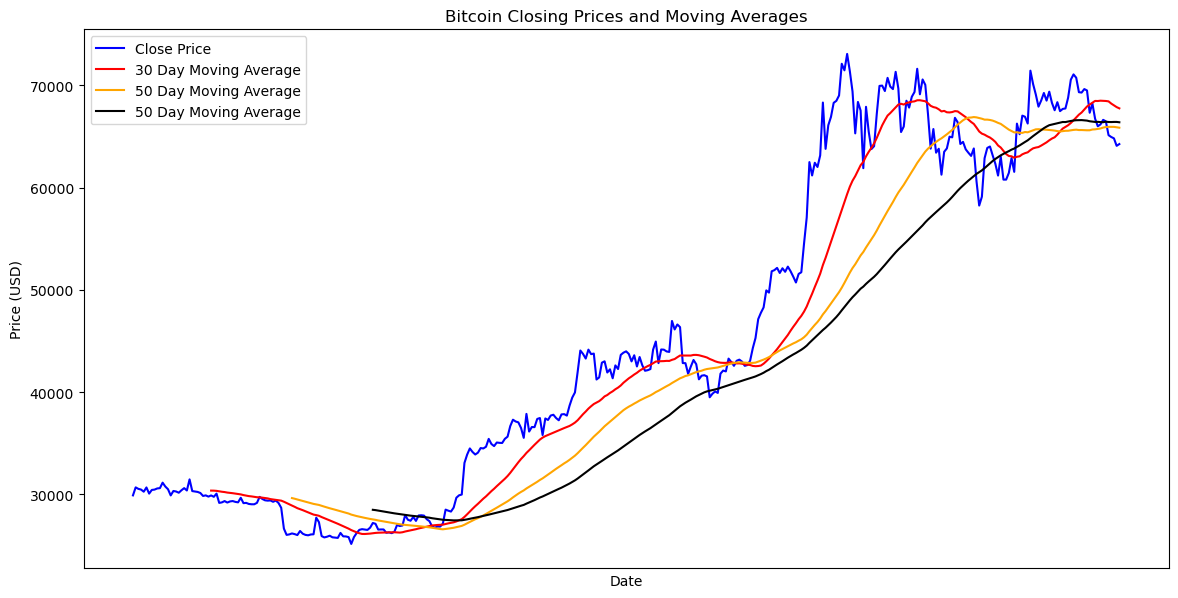

In [10]:

# Ensure 'Date' is a datetime type and set as index
new_df = df.copy()
# new_df.set_index('Date', inplace=True)

# Calculate moving averages
#MA=moving average
new_df['30 Day MA'] = new_df['Close'].rolling(window=30).mean()

new_df['60 Day MA'] = new_df['Close'].rolling(window=60).mean()
new_df['90 Day MA'] = new_df['Close'].rolling(window=90).mean()

# Plot closing prices and moving averages
plt.figure(figsize=(14, 7))
plt.plot(new_df['Close'], label='Close Price', color='blue')
plt.plot(new_df['30 Day MA'], label='30 Day Moving Average', color='red')
plt.plot(new_df['60 Day MA'], label='50 Day Moving Average', color='orange')
plt.plot(new_df['90 Day MA'], label='50 Day Moving Average', color='black')

plt.title('Bitcoin Closing Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks([])


Text(0, 0.5, 'PRICE(USD)')

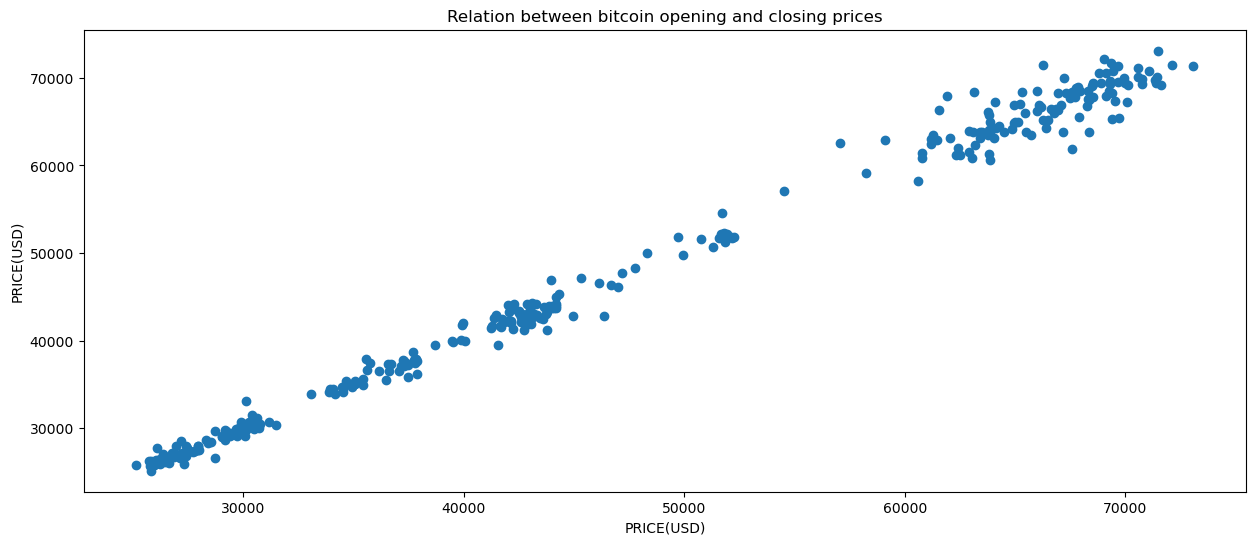

In [11]:
plt.plot(df['Open'],color='red')
plt.plot(df['Close'],color='blue')

plt.title('Relation between bitcoin opening and closing prices')
plt.xlabel('Time')
plt.ylabel('Price')

Text(0, 0.5, 'PRICE(USD)')

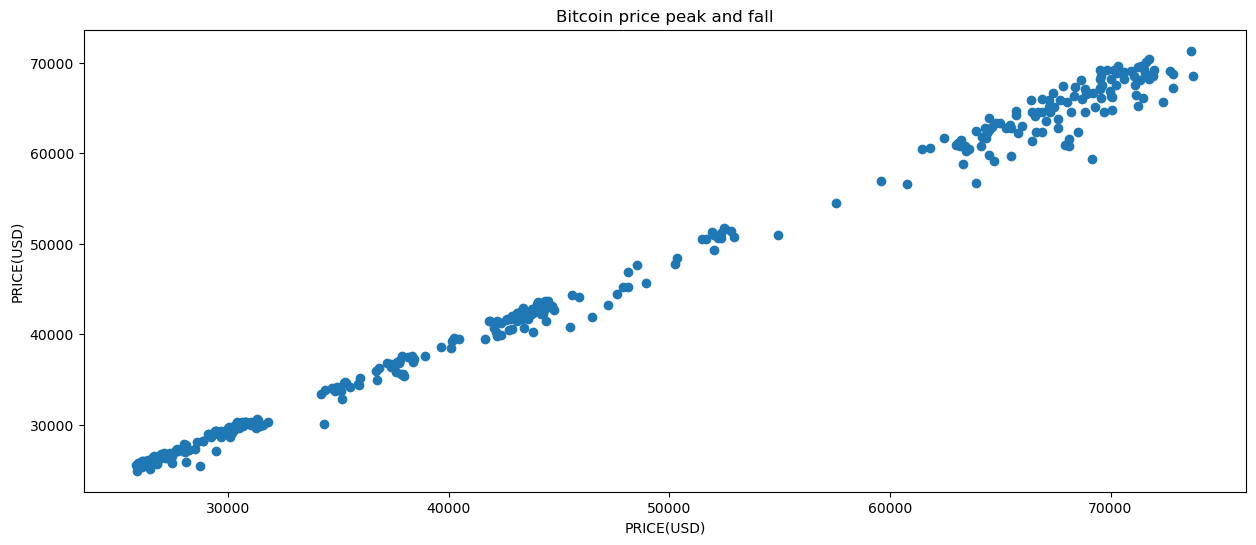

In [12]:
plt.plot(df['High'],color='red')
plt.plot(df['Low'],color='blue')

plt.title('Relation between highest and lowest daily prices')
plt.xlabel('Time')
plt.ylabel('Price')

In [13]:
weekly_df=df[df.index%7==0]
weekly_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2023-06-22,29995.935547,30495.998047,29679.158203,29912.281250,20653160491
7,2023-06-29,30086.187500,30796.250000,30057.203125,30445.351563,13180860821
14,2023-07-06,30507.150391,31460.052734,29892.226563,29909.337891,21129219509
21,2023-07-13,30387.488281,31814.515625,30268.351563,31476.048828,23686079548
28,2023-07-20,29915.250000,30195.531250,29638.095703,29792.015625,14655207121
35,2023-07-27,29353.798828,29560.966797,29099.351563,29210.689453,10770779217
42,2023-08-03,29161.812500,29375.707031,28959.488281,29178.679688,12780357746
49,2023-08-10,29563.972656,29688.564453,29354.447266,29429.591797,11865344789
56,2023-08-17,28699.802734,28745.947266,25409.111328,26664.550781,31120851211
63,2023-08-24,26431.519531,26554.910156,25914.925781,26162.373047,12871532023


Text(0.5, 1.0, 'Bitcoin price variation over the past year')

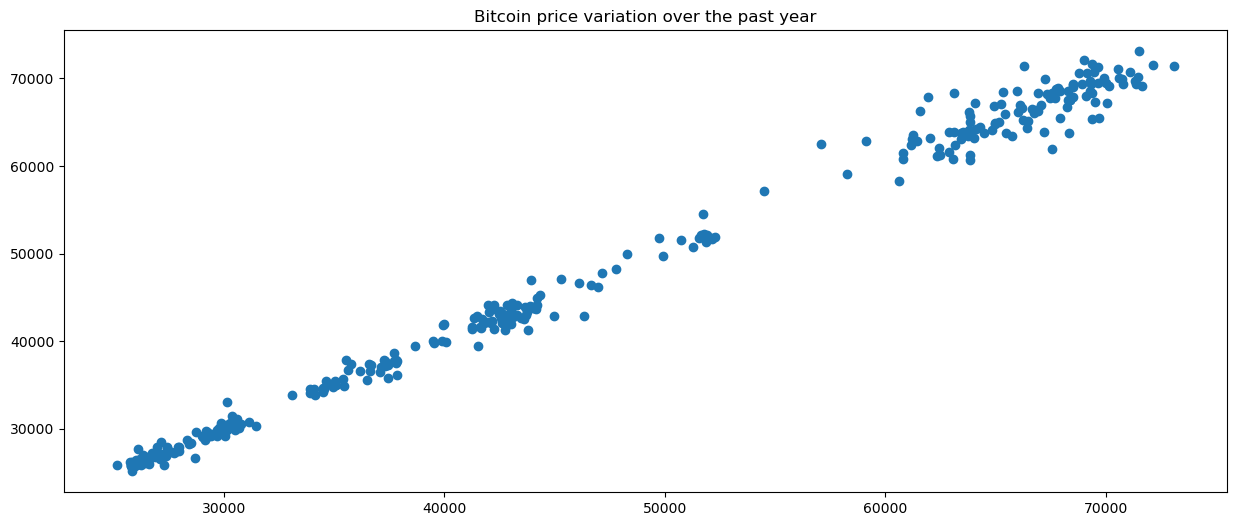

In [14]:
plt.scatter(df['Open'],df['Close'])
plt.title('Bitcoin price variation over the past year')

Text(0.5, 1.0, 'Weekly bitcoin opening price variations')

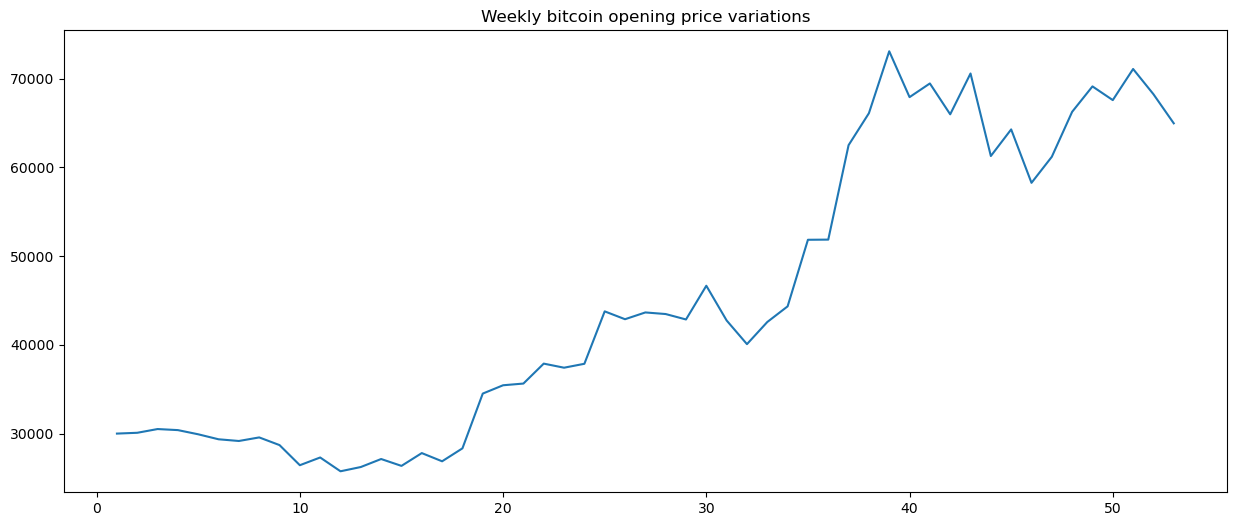

In [15]:
plt.plot(range(1,54),weekly_df['Open'])
plt.title('Weekly bitcoin opening price variations')

In [16]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [17]:
features=['High','Low','Close','Volume']
target=['Open']
X_train, X_test, y_train, y_test =train_test_split(df[features], df[target], test_size = 0.2,random_state=0)



In [21]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'


X = df[features].values
y = df[target].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Scaling
-In many machine learning applications, especially when using neural networks like LSTM, scaling the target variable (output) is a common practice. This is done for a few reasons:

-Improved Training Stability: Neural networks tend to perform better when the input and output values are scaled. This can lead to faster convergence and more stable training.

-Consistency with Scaled Inputs: If your input features are scaled, it can help if the target is scaled to a similar range, ensuring consistent treatment of data across the network.

-Numerical Precision: Scaling can prevent issues related to numerical precision, especially when dealing with very large or very small values.

In [23]:

scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))



In [24]:
# Reshape input to be [samples, time steps, features] as required bu the LSTM
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


<a name='2'></a>
## 2 - Long Short-Term Memory (LSTM) Network
Suitability of LSTMs:

Learning Long-Term Dependencies: LSTMs (Long Short-Term Memory) networks are a type of recurrent neural network (RNN) specifically designed to learn long-term dependencies in sequential data. This makes them suitable for capturing the relationships between historical price movements and future prices.
Gated Memory: LSTMs have a unique architecture with "gates" that control the flow of information. This allows them to remember relevant past information for longer periods and use it to make predictions, even when dealing with long sequences of historical data.
Handling Volatility: LSTMs are capable of learning from volatile data by adapting their internal weights and biases during training. This allows them to capture the changing dynamics of Bitcoin prices.
How the Model Works:

Data Preprocessing: Historical Bitcoin price data is preprocessed and transformed into a suitable format for the LSTM model. This might involve scaling the data, creating time sequences (windows of past data points), and potentially extracting additional features.
Input Layer: The preprocessed data is fed into the input layer of the sequential model. This layer receives a sequence of past prices as a single input.
LSTM Layers: The data then flows through the LSTM layers. Each LSTM layer has memory cells that can store and process information from previous time steps in the sequence. The "gates" in the LSTM allow the network to decide what information to remember, forget, and use for making predictions.
Output Layer: The final layer of the model (often a dense layer with one unit) takes the output from the last LSTM layer and generates a single prediction for the future price.
Advantages of this Model:

Captures Temporal Dependencies: LSTMs can learn complex relationships between past price movements and future prices.
Handles Volatility: The model can adapt to changing market conditions and price fluctuations.
Flexibility: You can adjust the number of LSTM layers and units to fine-tune the model for your specific dataset.
Scalability: The model can be trained on large datasets of historical Bitcoin prices.

The following figure shows the operations of an LSTM cell:

<img src="images/LSTM_figure4_v3a.png" style="width:500;height:400px;">
<caption><center><font color='purple'>|


### Overview of gates and states

#### Forget gate $\mathbf{\Gamma}_{f}$

* The "forget gate" is a tensor containing values between 0 and 1.
    * If a unit in the forget gate has a value close to 0, the LSTM will "forget" the stored state in the corresponding unit of the previous cell state.
    * If a unit in the forget gate has a value close to 1, the LSTM will mostly remember the corresponding value in the stored state.

##### Equation

$$\mathbf{\Gamma}_f^{\langle t \rangle} = \sigma(\mathbf{W}_f[\mathbf{a}^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_f)\tag{1} $$

##### Explanation of the equation:

* $\mathbf{W_{f}}$ contains weights that govern the forget gate's behavior. 
* The previous time step's hidden state $[a^{\langle t-1 \rangle}$ and current time step's input $x^{\langle t \rangle}]$ are concatenated together and multiplied by $\mathbf{W_{f}}$. 
* A sigmoid function is used to make each of the gate tensor's values $\mathbf{\Gamma}_f^{\langle t \rangle}$ range from 0 to 1.
* The forget gate  $\mathbf{\Gamma}_f^{\langle t \rangle}$ has the same dimensions as the previous cell state $c^{\langle t-1 \rangle}$. 
* This means that the two can be multiplied together, element-wise.
* Multiplying the tensors $\mathbf{\Gamma}_f^{\langle t \rangle} * \mathbf{c}^{\langle t-1 \rangle}$ is like applying a mask over the previous cell state.
* If a single value in $\mathbf{\Gamma}_f^{\langle t \rangle}$ is 0 or close to 0, then the product is close to 0.
    * This keeps the information stored in the corresponding unit in $\mathbf{c}^{\langle t-1 \rangle}$ from being remembered for the next time step.
* Similarly, if one value is close to 1, the product is close to the original value in the previous cell state.
    * The LSTM will keep the information from the corresponding unit of $\mathbf{c}^{\langle t-1 \rangle}$, to be used in the next time step.
    


#### Candidate value $\tilde{\mathbf{c}}^{\langle t \rangle}$
* The candidate value is a tensor containing information from the current time step that **may** be stored in the current cell state $\mathbf{c}^{\langle t \rangle}$.
* The parts of the candidate value that get passed on depend on the update gate.
* The candidate value is a tensor containing values that range from -1 to 1.
* The tilde "~" is used to differentiate the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ from the cell state $\mathbf{c}^{\langle t \rangle}$.

##### Equation
$$\mathbf{\tilde{c}}^{\langle t \rangle} = \tanh\left( \mathbf{W}_{c} [\mathbf{a}^{\langle t - 1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_{c} \right) \tag{3}$$

##### Explanation of the equation
* The *tanh* function produces values between -1 and 1.




#### Hidden state $\mathbf{a}^{\langle t \rangle}$

* The hidden state gets passed to the LSTM cell's next time step.
* It is used to determine the three gates ($\mathbf{\Gamma}_{f}, \mathbf{\Gamma}_{u}, \mathbf{\Gamma}_{o}$) of the next time step.
* The hidden state is also used for the prediction $y^{\langle t \rangle}$.

##### Equation

$$ \mathbf{a}^{\langle t \rangle} = \mathbf{\Gamma}_o^{\langle t \rangle} * \tanh(\mathbf{c}^{\langle t \rangle})\tag{6} $$

##### Explanation of equation
* The hidden state $\mathbf{a}^{\langle t \rangle}$ is determined by the cell state $\mathbf{c}^{\langle t \rangle}$ in combination with the output gate $\mathbf{\Gamma}_{o}$.
* The cell state state is passed through the `tanh` function to rescale values between -1 and 1.
* The output gate acts like a "mask" that either preserves the values of $\tanh(\mathbf{c}^{\langle t \rangle})$ or keeps those values from being included in the hidden state $\mathbf{a}^{\langle t \rangle}$



#### Update gate $\mathbf{\Gamma}_{i}$

* You use the update gate to decide what aspects of the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to add to the cell state $c^{\langle t \rangle}$.
* The update gate decides what parts of a "candidate" tensor $\tilde{\mathbf{c}}^{\langle t \rangle}$ are passed onto the cell state $\mathbf{c}^{\langle t \rangle}$.
* The update gate is a tensor containing values between 0 and 1.
    * When a unit in the update gate is close to 1, it allows the value of the candidate $\tilde{\mathbf{c}}^{\langle t \rangle}$ to be passed onto the hidden state $\mathbf{c}^{\langle t \rangle}$
    * When a unit in the update gate is close to 0, it prevents the corresponding value in the candidate from being passed onto the hidden state.
* Notice that the subscript "i" is used and not "u", to follow the convention used in the literature.

##### Equation

$$\mathbf{\Gamma}_i^{\langle t \rangle} = \sigma(\mathbf{W}_i[a^{\langle t-1 \rangle}, \mathbf{x}^{\langle t \rangle}] + \mathbf{b}_i)\tag{2} $$ 

##### Explanation of the equation

* Similar to the forget gate, here $\mathbf{\Gamma}_i^{\langle t \rangle}$, the sigmoid produces values between 0 and 1.
* The update gate is multiplied element-wise with the candidate, and this product ($\mathbf{\Gamma}_{i}^{\langle t \rangle} * \tilde{c}^{\langle t \rangle}$) is used in determining the cell state $\mathbf{c}^{\langle t \rangle}$.




```
        Input Layer (Shape: (batch_size, timesteps, features))
              |
              v
   +--------+--------+--------+--------+--------+--------+
   |        |        |        |        |        |        |
   |  Feature |  Feature |  Feature |  Feature |  Feature| ... | (X_train.shape[1] features)
   |        |        |        |        |        |        |
   +--------+--------+--------+--------+--------+--------+
              |
              v
   +--------------------+ (timesteps steps)
   |  LSTM Layer 1 (256 units) |
   |   Return Sequences  | (return full outputs)
   +--------------------+
              |
              v
   +--------------------+
   |  LSTM Layer 2 (256 units) |
   +--------------------+
              |
              v
   +--------------------+
   |  Dense Layer 1 (1 unit) |
   |       Output       |
   +--------------------+

  batch_size: number of samples in a batch
  timesteps: number of time steps in each sample
  features: number of features per time step
```

**Explanation:**

* **Input Layer:** This layer receives the input data with a shape of `(batch_size, timesteps, features)`. Here:
    * `batch_size` represents the number of samples processed together during training.
    * `timesteps` represents the number of time steps or sequences within each sample. 
    * `features` represents the number of features extracted at each time step.
    * In your case, the specific shape comes from `X_train.shape`.

* **LSTM Layer 1 (256 units, return_sequences=True):** 
    * This is the first LSTM layer with 256 hidden units. 
    * The `return_sequences=True` argument tells the layer to return the entire output sequence for each input, not just the final step. This allows the second LSTM layer to process the information across multiple time steps.

* **LSTM Layer 2 (256 units):** 
    * This is the second LSTM layer, also with 256 hidden units. 
    * It receives the full output sequences from the first LSTM layer and processes them further.

* **Dense Layer 1 (1 unit):** 
    * This is the final output layer with a single unit. 
    * Since we're  predicting a single value, the output layer has one unit. It activates the output using a linear activation function.

**Overall, this model uses a stacked LSTM architecture to capture temporal dependencies in the time series data (Bitcoin prices). The two LSTM layers with "return sequences" allow the model to learn patterns across multiple time steps.**

In [25]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(LSTM(256))
model.add(Dense(1))

C:\Users\sadam\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [27]:
# ModelCheckpoint: Save the best model based on validation loss.
# EarlyStopping: Stop training if validation loss does not improve for 20 epochs.
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)

# Fit the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=16, shuffle=False, 
                    validation_data=(X_test_scaled, y_test_scaled), 
                    callbacks=[checkpoint, early_stopping])


Epoch 1/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2309
Epoch 1: val_loss improved from inf to 0.02308, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - loss: 0.2161 - val_loss: 0.0231
Epoch 2/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0230
Epoch 2: val_loss improved from 0.02308 to 0.00945, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0222 - val_loss: 0.0095
Epoch 3/100
17/19 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0068
Epoch 3: val_loss improved from 0.00945 to 0.00145, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0064 - val_loss: 0.0015
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0011
Epoch 4: val_loss improved from 0.00145 to 0.00034, saving model to best_model.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0011 - val_loss: 3.3977e-04
Epoch 5/100
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.8778e-04
Epoch 5: val_loss impro

In [28]:



# Load the best model
model.load_weights('best_model.keras')

y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)



3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step
Mean Squared Error (MSE): 315882.6680867788


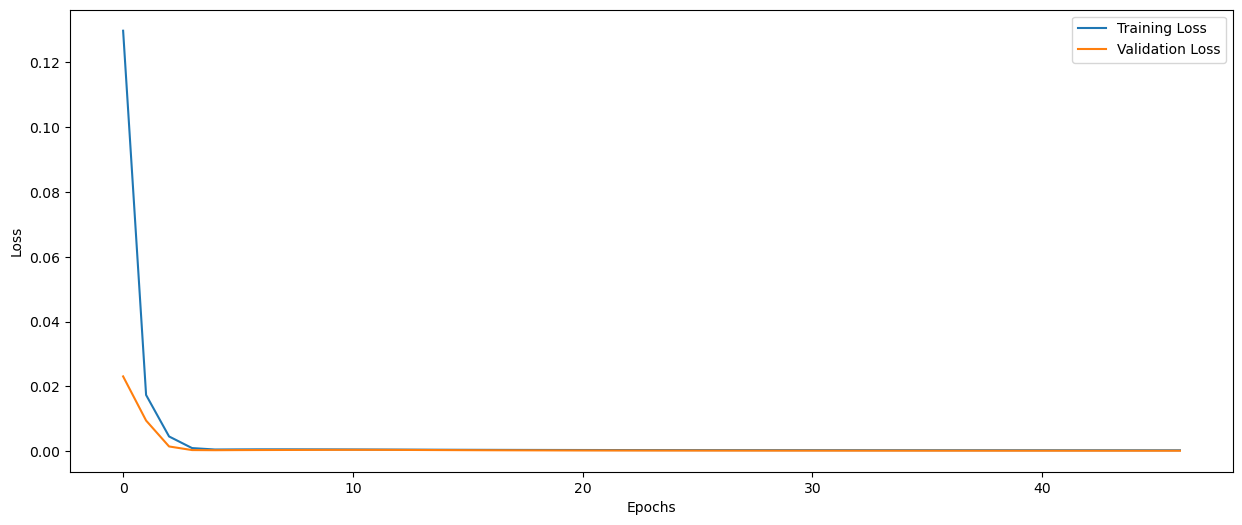

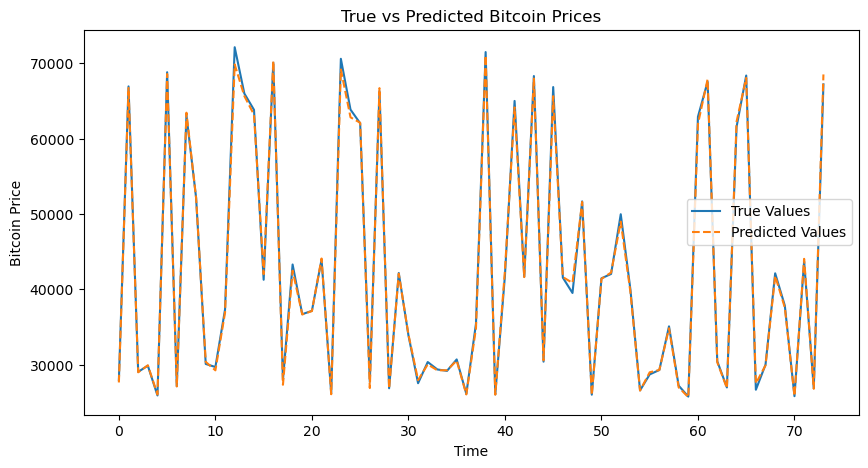

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot true vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Values')
plt.plot(y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.title('True vs Predicted Bitcoin Prices')
plt.show()
